In [1]:
import scipy.io
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

# Load the MATLAB file
mat_data = scipy.io.loadmat('allVids_pca_scores.mat')

# Check the available keys in the loaded MATLAB file
print(mat_data.keys())

# Replace 'matrix' with the correct key for accessing the data matrix
data_matrix = mat_data['pcaScores']
labels = data_matrix[:, -2]

# Split the data into training and testing sets
train_data = data_matrix[labels != 4, :-2]
train_labels = labels[labels != 4]
test_data = data_matrix[labels == 4, :-2]
test_labels = labels[labels == 4]

# Initialize and train the SVM classifier
clf = svm.SVC()
clf.fit(train_data, train_labels)

# Predict labels for the test data
predictions = clf.predict(test_data)

# Calculate accuracy and print information for each subject
unique_subjects = set(test_labels)
for subject in unique_subjects:
    subject_indices = (test_labels == subject)
    subject_predictions = predictions[subject_indices]
    subject_true_labels = test_labels[subject_indices]
    subject_accuracy = accuracy_score(subject_true_labels, subject_predictions)

    print(f"Subject {subject}:")
    print(f"Accuracy: {subject_accuracy}")
    print(classification_report(subject_true_labels, subject_predictions))
    print("")

# Calculate overall accuracy
overall_accuracy = accuracy_score(test_labels, predictions)
print("Overall Accuracy:", overall_accuracy)


dict_keys(['__header__', '__version__', '__globals__', 'pcaScores'])
Subject 4.0:
Accuracy: 0.0
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       0.0
         2.0       0.00      0.00      0.00       0.0
         3.0       0.00      0.00      0.00       0.0
         4.0       0.00      0.00      0.00     608.0
         5.0       0.00      0.00      0.00       0.0
         6.0       0.00      0.00      0.00       0.0
         7.0       0.00      0.00      0.00       0.0
         8.0       0.00      0.00      0.00       0.0
         9.0       0.00      0.00      0.00       0.0
        10.0       0.00      0.00      0.00       0.0
        11.0       0.00      0.00      0.00       0.0
        12.0       0.00      0.00      0.00       0.0
        13.0       0.00      0.00      0.00       0.0
        14.0       0.00      0.00      0.00       0.0
        15.0       0.00      0.00      0.00       0.0
        17.0       0.00      0.00      

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\skle

In [2]:
import scipy.io
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Load the MATLAB file
mat_data = scipy.io.loadmat('allVids_pca_scores.mat')

# Replace 'pcaScores' with the correct key for accessing the data matrix
data_matrix = mat_data['pcaScores']
labels = data_matrix[:, -2]

# Split the data into training and testing sets
train_data = data_matrix[labels != 4, :-2]
train_labels = labels[labels != 4]
test_data = data_matrix[labels == 4, :-2]
test_labels = labels[labels == 4]

# Perform data augmentation using SMOTE
smote = SMOTE()
train_data_aug, train_labels_aug = smote.fit_resample(train_data, train_labels)

# Hyperparameter tuning using grid search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
clf = svm.SVC()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(train_data_aug, train_labels_aug)
best_params = grid_search.best_params_

# Initialize and train the SVM classifier with the best parameters
clf = svm.SVC(**best_params)
clf.fit(train_data_aug, train_labels_aug)

# Predict labels for the test data
predictions = clf.predict(test_data)

# Calculate accuracy and print information for each subject
unique_subjects = set(test_labels)
for subject in unique_subjects:
    subject_indices = (test_labels == subject)
    subject_predictions = predictions[subject_indices]
    subject_true_labels = test_labels[subject_indices]
    subject_accuracy = accuracy_score(subject_true_labels, subject_predictions)

    print(f"Subject {subject}:")
    print(f"Accuracy: {subject_accuracy}")
    print(classification_report(subject_true_labels, subject_predictions))
    print("")

# Calculate overall accuracy
overall_accuracy = accuracy_score(test_labels, predictions)
print("Overall Accuracy:", overall_accuracy)


Subject 4.0:
Accuracy: 0.0
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       0.0
         4.0       0.00      0.00      0.00     608.0
         6.0       0.00      0.00      0.00       0.0
         9.0       0.00      0.00      0.00       0.0
        10.0       0.00      0.00      0.00       0.0
        11.0       0.00      0.00      0.00       0.0
        12.0       0.00      0.00      0.00       0.0
        15.0       0.00      0.00      0.00       0.0
        17.0       0.00      0.00      0.00       0.0
        18.0       0.00      0.00      0.00       0.0
        19.0       0.00      0.00      0.00       0.0

    accuracy                           0.00     608.0
   macro avg       0.00      0.00      0.00     608.0
weighted avg       0.00      0.00      0.00     608.0


Overall Accuracy: 0.0


E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\skle

In [4]:
import scipy.io
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Load the MATLAB file
mat_data = scipy.io.loadmat('concat_with_labels.mat')
# mat_data = scipy.io.loadmat('allVids_pca_scores.mat')

# Check the available keys in the loaded MATLAB file
print(mat_data.keys())

# Replace 'pcaScores' with the correct key for accessing the data matrix
data_matrix = mat_data['result']
# data_matrix = mat_data['pcaScores']
labels = data_matrix[:, -2]  # Use the 2nd last column as the labels
train_test_indicator = data_matrix[:, -1]  # Use the last column as the train/test indicator

# Split the data into training and testing sets
train_data = data_matrix[train_test_indicator != 4, :-2]  # Exclude the last two columns
train_labels = labels[train_test_indicator != 4]
test_data = data_matrix[train_test_indicator == 4, :-2]  # Exclude the last two columns
test_labels = labels[train_test_indicator == 4]

# Perform data augmentation using SMOTE
smote = SMOTE()
train_data_aug, train_labels_aug = smote.fit_resample(train_data, train_labels)

# Hyperparameter tuning using grid search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
clf = svm.SVC()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(train_data_aug, train_labels_aug)
best_params = grid_search.best_params_

# Initialize and train the SVM classifier with the best parameters
clf = svm.SVC(**best_params)
clf.fit(train_data_aug, train_labels_aug)

# Predict labels for the test data
predictions = clf.predict(test_data)

# Calculate accuracy and print information for each subject
unique_subjects = set(test_labels)
for subject in unique_subjects:
    subject_indices = (test_labels == subject)
    subject_predictions = predictions[subject_indices]
    subject_true_labels = test_labels[subject_indices]
    subject_accuracy = accuracy_score(subject_true_labels, subject_predictions)

    print(f"Subject {subject}:")
    print(f"Accuracy: {subject_accuracy}")
    print(classification_report(subject_true_labels, subject_predictions))
    print("")

    incorrect_predictions = subject_predictions[subject_predictions != subject_true_labels]
    incorrect_subjects = subject_true_labels[subject_predictions != subject_true_labels]
    if len(incorrect_predictions) > 0:
        for i in range(len(incorrect_predictions)):
            print(f"Incorrectly identified as Subject {incorrect_predictions[i]}, True label: {incorrect_subjects[i]}")
        print("")

# Calculate overall accuracy
overall_accuracy = accuracy_score(test_labels, predictions)
print("Overall Accuracy:", overall_accuracy)


dict_keys(['__header__', '__version__', '__globals__', 'result'])
Subject 1.0:
Accuracy: 0.039473684210526314
              precision    recall  f1-score   support

         1.0       1.00      0.04      0.08       152
         2.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0
        20.0       0.00      0.00      0.00         0

    accuracy                           0.04       152
   macro avg       0.08      0.00      0.01       152
weighted avg       1.00      0.04      0.08       152


Incorrectly identified

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         5.0       1.00      0.66      0.80       152
         6.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0
        19.0       0.00      0.00      0.00         0
        20.0       0.00      0.00      0.00         0

    accuracy                           0.66       152
   macro avg       0.08      0.06      0.07       152
weighted avg       1.00      0.66      0.80       152


Incorrectly identified as Subject 15.0, True label: 5.0
Incorrectly identified as Subject 6.0, True label: 5.0
Incorrectly identifie

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\skle

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       1.00      0.02      0.04       152
        11.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        17.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0
        20.0       0.00      0.00      0.00         0

    accuracy                           0.02       152
   macro avg       0.08      0.00      0.00       152
weighted avg       1.00      0.02      0.04       152


Incorrectly identified as Subject 5.0, True label: 9.0
Incorrectly identified as Subject 5.0, True label: 9.0
Incorrectly identified

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\skle

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        12.0       1.00      0.01      0.03       152
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0
        19.0       0.00      0.00      0.00         0
        20.0       0.00      0.00      0.00         0

    accuracy                           0.01       152
   macro avg       0.08      0.00      0.00       152
weighted avg       1.00      0.01      0.03       152


Incorrectly identified as Subject 5.0, True label: 12.0
Incorrectly identified

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        16.0       1.00      0.03      0.05       152
        17.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0
        19.0       0.00      0.00      0.00         0
        20.0       0.00      0.00      0.00         0

    accuracy                           0.03       152
   macro avg       0.07      0.00      0.00       152
weighted avg       1.00   

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\skle

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        18.0       1.00      0.03      0.05       152

    accuracy                           0.03       152
   macro avg       0.07      0.00      0.00       152
weighted avg       1.00      0.03      0.05       152


Incorrectly identified a

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\skle

In [5]:
import scipy.io
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Load the MATLAB file
mat_data = scipy.io.loadmat('concat_with_labels.mat')

# Check the available keys in the loaded MATLAB file
print(mat_data.keys())

# Replace 'result' with the correct key for accessing the data matrix
data_matrix = mat_data['result']
labels = data_matrix[:, -2]  # Use the 2nd last column as the labels
train_test_indicator = data_matrix[:, -1]  # Use the last column as the train/test indicator

# Split the data into training and testing sets
train_data = data_matrix[train_test_indicator != 4, :-2]  # Exclude the last two columns
train_labels = labels[train_test_indicator != 4]
test_data = data_matrix[train_test_indicator == 4, :-2]  # Exclude the last two columns
test_labels = labels[train_test_indicator == 4]

print("Labeled Dataset for Training:")
print(train_data)
print(train_labels)
print("")

print("Labeled Dataset for Testing:")
print(test_data)
print(test_labels)
print("")

# Perform data augmentation using SMOTE
smote = SMOTE()
train_data_aug, train_labels_aug = smote.fit_resample(train_data, train_labels)

# Hyperparameter tuning using grid search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
clf = svm.SVC()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(train_data_aug, train_labels_aug)
best_params = grid_search.best_params_

# Initialize and train the SVM classifier with the best parameters
clf = svm.SVC(**best_params)
clf.fit(train_data_aug, train_labels_aug)

# Predict labels for the test data
predictions = clf.predict(test_data)

# Calculate accuracy and print information for each subject
unique_subjects = set(test_labels)
for subject in unique_subjects:
    subject_indices = (test_labels == subject)
    subject_predictions = predictions[subject_indices]
    subject_true_labels = test_labels[subject_indices]
    subject_accuracy = accuracy_score(subject_true_labels, subject_predictions)

    print(f"Subject {subject}:")
    print(f"Accuracy: {subject_accuracy}")
    print(classification_report(subject_true_labels, subject_predictions, zero_division=1))
    print("")

    incorrect_predictions = subject_predictions[subject_predictions != subject_true_labels]
    incorrect_subjects = subject_true_labels[subject_predictions != subject_true_labels]
    if len(incorrect_predictions) > 0:
        for i in range(len(incorrect_predictions)):
            print(f"Incorrectly identified as Subject {incorrect_predictions[i]}, True label: {incorrect_subjects[i]}")
        print("")

# Calculate overall accuracy
overall_accuracy = accuracy_score(test_labels, predictions)
print("Overall Accuracy:", overall_accuracy)


dict_keys(['__header__', '__version__', '__globals__', 'result'])
Labeled Dataset for Training:
[[-2.3434875e-03 -9.2728803e-04 -5.7352433e-04 -3.8160043e-04
  -3.8647422e-04]
 [-1.1716760e-03 -5.3685100e-04 -3.2451382e-04 -2.2718690e-04
  -1.9859031e-04]
 [-7.7698787e-04 -4.0876228e-04 -2.4672030e-04 -1.7152824e-04
  -1.4327651e-04]
 ...
 [-1.9976658e-01 -2.1829977e-04 -1.9344543e-04  3.2646043e-04
  -7.5367759e-03]
 [-2.2036020e-01 -3.1019995e-04  9.2988060e-04 -3.9597557e-04
  -8.0290949e-04]
 [-2.3226373e-01 -2.3141443e-03 -2.3879082e-05 -5.0307240e-04
   7.2800840e-04]]
[ 1.  1.  1. ... 20. 20. 20.]

Labeled Dataset for Testing:
[[ 3.2412692e-03 -7.2874472e-04  7.1667752e-04  3.5531742e-03
   8.3183200e-04]
 [ 1.6148357e-03 -4.7370407e-04  4.1220288e-04  3.8707908e-03
   4.9793394e-04]
 [ 1.0803846e-03 -3.5210190e-04  2.6451741e-04  3.8206421e-03
   3.5812322e-04]
 ...
 [-2.2415991e-01  1.7007174e-04  3.8863880e-05 -2.4161924e-02
  -3.5208696e-01]
 [-2.4636187e-01 -1.0112803e-03  

              precision    recall  f1-score   support

         1.0       0.00      1.00      0.00         0
         2.0       0.00      1.00      0.00         0
         5.0       1.00      0.66      0.80       152
         6.0       0.00      1.00      0.00         0
         8.0       0.00      1.00      0.00         0
         9.0       0.00      1.00      0.00         0
        10.0       0.00      1.00      0.00         0
        11.0       0.00      1.00      0.00         0
        15.0       0.00      1.00      0.00         0
        18.0       0.00      1.00      0.00         0
        19.0       0.00      1.00      0.00         0
        20.0       0.00      1.00      0.00         0

    accuracy                           0.66       152
   macro avg       0.08      0.97      0.07       152
weighted avg       1.00      0.66      0.80       152


Incorrectly identified as Subject 15.0, True label: 5.0
Incorrectly identified as Subject 6.0, True label: 5.0
Incorrectly identifie

              precision    recall  f1-score   support

         1.0       0.00      1.00      0.00         0
         2.0       0.00      1.00      0.00         0
         5.0       0.00      1.00      0.00         0
         6.0       0.00      1.00      0.00         0
         8.0       0.00      1.00      0.00         0
         9.0       1.00      0.02      0.04       152
        11.0       0.00      1.00      0.00         0
        14.0       0.00      1.00      0.00         0
        16.0       0.00      1.00      0.00         0
        17.0       0.00      1.00      0.00         0
        18.0       0.00      1.00      0.00         0
        20.0       0.00      1.00      0.00         0

    accuracy                           0.02       152
   macro avg       0.08      0.92      0.00       152
weighted avg       1.00      0.02      0.04       152


Incorrectly identified as Subject 5.0, True label: 9.0
Incorrectly identified as Subject 5.0, True label: 9.0
Incorrectly identified

              precision    recall  f1-score   support

         1.0       0.00      1.00      0.00         0
         2.0       0.00      1.00      0.00         0
         5.0       0.00      1.00      0.00         0
         8.0       0.00      1.00      0.00         0
         9.0       0.00      1.00      0.00         0
        10.0       0.00      1.00      0.00         0
        12.0       1.00      0.01      0.03       152
        14.0       0.00      1.00      0.00         0
        15.0       0.00      1.00      0.00         0
        16.0       0.00      1.00      0.00         0
        18.0       0.00      1.00      0.00         0
        19.0       0.00      1.00      0.00         0
        20.0       0.00      1.00      0.00         0

    accuracy                           0.01       152
   macro avg       0.08      0.92      0.00       152
weighted avg       1.00      0.01      0.03       152


Incorrectly identified as Subject 5.0, True label: 12.0
Incorrectly identified

Subject 15.0:
Accuracy: 0.0
              precision    recall  f1-score   support

         1.0       0.00      1.00      0.00       0.0
         2.0       0.00      1.00      0.00       0.0
         5.0       0.00      1.00      0.00       0.0
         6.0       0.00      1.00      0.00       0.0
         8.0       0.00      1.00      0.00       0.0
         9.0       0.00      1.00      0.00       0.0
        10.0       0.00      1.00      0.00       0.0
        11.0       0.00      1.00      0.00       0.0
        14.0       0.00      1.00      0.00       0.0
        15.0       1.00      0.00      0.00     152.0
        18.0       0.00      1.00      0.00       0.0
        20.0       0.00      1.00      0.00       0.0

    accuracy                           0.00     152.0
   macro avg       0.08      0.92      0.00     152.0
weighted avg       1.00      0.00      0.00     152.0


Incorrectly identified as Subject 5.0, True label: 15.0
Incorrectly identified as Subject 5.0, True labe

              precision    recall  f1-score   support

         1.0       0.00      1.00      0.00         0
         2.0       0.00      1.00      0.00         0
         3.0       0.00      1.00      0.00         0
         5.0       0.00      1.00      0.00         0
         6.0       0.00      1.00      0.00         0
         8.0       0.00      1.00      0.00         0
         9.0       0.00      1.00      0.00         0
        10.0       0.00      1.00      0.00         0
        11.0       0.00      1.00      0.00         0
        13.0       0.00      1.00      0.00         0
        14.0       0.00      1.00      0.00         0
        15.0       0.00      1.00      0.00         0
        16.0       0.00      1.00      0.00         0
        18.0       1.00      0.03      0.05       152

    accuracy                           0.03       152
   macro avg       0.07      0.93      0.00       152
weighted avg       1.00      0.03      0.05       152


Incorrectly identified a

In [6]:
import scipy.io
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Load the MATLAB file
mat_data = scipy.io.loadmat('concat_with_labels.mat')

# Check the available keys in the loaded MATLAB file
print(mat_data.keys())

# Replace 'result' with the correct key for accessing the data matrix
data_matrix = mat_data['result']
labels = data_matrix[:, -2]  # Use the 2nd last column as the labels
train_test_indicator = data_matrix[:, -1]  # Use the last column as the train/test indicator

# Split the data into training and testing sets
train_data = data_matrix[train_test_indicator != 4, :-2]  # Exclude the last two columns
train_labels = labels[train_test_indicator != 4]
test_data = data_matrix[train_test_indicator == 4, :-2]  # Exclude the last two columns
test_labels = labels[train_test_indicator == 4]

print("Labeled Dataset for Training:")
print(train_data)
print(train_labels)
print("")

print("Labeled Dataset for Testing:")
print(test_data)
print(test_labels)
print("")

# Perform data augmentation using SMOTE
smote = SMOTE()
train_data_aug, train_labels_aug = smote.fit_resample(train_data, train_labels)

# Hyperparameter tuning using grid search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
clf = svm.SVC()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(train_data_aug, train_labels_aug)
best_params = grid_search.best_params_

# Initialize and train the SVM classifier with the best parameters
clf = svm.SVC(**best_params)
clf.fit(train_data_aug, train_labels_aug)

# Predict labels for the test data
predictions = clf.predict(test_data)

# Calculate accuracy and print information for each subject
unique_subjects = set(test_labels)
for subject in unique_subjects:
    subject_indices = (test_labels == subject)
    subject_predictions = predictions[subject_indices]
    subject_true_labels = test_labels[subject_indices]
    subject_accuracy = accuracy_score(subject_true_labels, subject_predictions)

    print(f"Subject {subject}:")
    print(f"Accuracy: {subject_accuracy * 100:.2f}%")
    print(classification_report(subject_true_labels, subject_predictions, zero_division=1))
    print("")

    correct_predictions = subject_predictions[subject_predictions == subject_true_labels]
    if len(correct_predictions) > 0:
        for i in range(len(correct_predictions)):
            print(f"Accurately identified as Subject {correct_predictions[i]}, True label: {subject_true_labels[i]}")
        print("")

# Calculate overall accuracy
overall_accuracy = accuracy_score(test_labels, predictions)
print("Overall Accuracy:", overall_accuracy * 100)


dict_keys(['__header__', '__version__', '__globals__', 'result'])
Labeled Dataset for Training:
[[-2.3434875e-03 -9.2728803e-04 -5.7352433e-04 -3.8160043e-04
  -3.8647422e-04]
 [-1.1716760e-03 -5.3685100e-04 -3.2451382e-04 -2.2718690e-04
  -1.9859031e-04]
 [-7.7698787e-04 -4.0876228e-04 -2.4672030e-04 -1.7152824e-04
  -1.4327651e-04]
 ...
 [-1.9976658e-01 -2.1829977e-04 -1.9344543e-04  3.2646043e-04
  -7.5367759e-03]
 [-2.2036020e-01 -3.1019995e-04  9.2988060e-04 -3.9597557e-04
  -8.0290949e-04]
 [-2.3226373e-01 -2.3141443e-03 -2.3879082e-05 -5.0307240e-04
   7.2800840e-04]]
[ 1.  1.  1. ... 20. 20. 20.]

Labeled Dataset for Testing:
[[ 3.2412692e-03 -7.2874472e-04  7.1667752e-04  3.5531742e-03
   8.3183200e-04]
 [ 1.6148357e-03 -4.7370407e-04  4.1220288e-04  3.8707908e-03
   4.9793394e-04]
 [ 1.0803846e-03 -3.5210190e-04  2.6451741e-04  3.8206421e-03
   3.5812322e-04]
 ...
 [-2.2415991e-01  1.7007174e-04  3.8863880e-05 -2.4161924e-02
  -3.5208696e-01]
 [-2.4636187e-01 -1.0112803e-03  

              precision    recall  f1-score   support

         1.0       0.00      1.00      0.00       0.0
         2.0       0.00      1.00      0.00       0.0
         4.0       0.00      1.00      0.00       0.0
         5.0       0.00      1.00      0.00       0.0
         6.0       0.00      1.00      0.00       0.0
         7.0       1.00      0.00      0.00     152.0
         8.0       0.00      1.00      0.00       0.0
         9.0       0.00      1.00      0.00       0.0
        10.0       0.00      1.00      0.00       0.0
        13.0       0.00      1.00      0.00       0.0
        15.0       0.00      1.00      0.00       0.0
        16.0       0.00      1.00      0.00       0.0
        18.0       0.00      1.00      0.00       0.0
        19.0       0.00      1.00      0.00       0.0

    accuracy                           0.00     152.0
   macro avg       0.07      0.93      0.00     152.0
weighted avg       1.00      0.00      0.00     152.0


Subject 8.0:
Accuracy: 0



Accurately identified as Subject 18.0, True label: 18.0
Accurately identified as Subject 18.0, True label: 18.0
Accurately identified as Subject 18.0, True label: 18.0
Accurately identified as Subject 18.0, True label: 18.0

Subject 19.0:
Accuracy: 3.29%
              precision    recall  f1-score   support

         1.0       0.00      1.00      0.00         0
         2.0       0.00      1.00      0.00         0
         3.0       0.00      1.00      0.00         0
         4.0       0.00      1.00      0.00         0
         5.0       0.00      1.00      0.00         0
         6.0       0.00      1.00      0.00         0
         9.0       0.00      1.00      0.00         0
        10.0       0.00      1.00      0.00         0
        14.0       0.00      1.00      0.00         0
        19.0       1.00      0.03      0.06       152

    accuracy                           0.03       152
   macro avg       0.10      0.90      0.01       152
weighted avg       1.00      0.03      

In [7]:
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Load the .mat file
data = scipy.io.loadmat('concat_with_labels.mat')

# Extract the matrix from the loaded data
matrix = data['result']

# Extract the features (first 5 columns)
features = matrix[:, :5]

# Extract the labels (second-to-last column)
labels = matrix[:, -2]

# Extract the train/test indicator (last column)
train_test_indicator = matrix[:, -1]

# Separate the training and testing data
train_features = features[train_test_indicator != 4]
train_labels = labels[train_test_indicator != 4]

test_features = features[train_test_indicator == 4]
test_labels = labels[train_test_indicator == 4]

# Train a logistic regression model
model = LogisticRegression()
model.fit(train_features, train_labels)

# Predict labels for the test data
predicted_labels = model.predict(test_features)

# Evaluate the accuracy of the model
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.04967105263157895


In [8]:
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Load the .mat file
data = scipy.io.loadmat('concat_with_labels.mat')

# Extract the matrix from the loaded data
matrix = data['result']

# Extract the features (first 5 columns)
features = matrix[:, :5]

# Extract the labels (second-to-last column)
labels = matrix[:, -2]

# Extract the train/test indicator (last column)
train_test_indicator = matrix[:, -1]

# Separate the training and testing data
train_features = features[train_test_indicator != 4]
train_labels = labels[train_test_indicator != 4]

test_features = features[train_test_indicator == 4]
test_labels = labels[train_test_indicator == 4]

# Train a Random Forest classifier
model = RandomForestClassifier()
model.fit(train_features, train_labels)

# Predict labels for the test data
predicted_labels = model.predict(test_features)

# Evaluate the accuracy of the model
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.06118421052631579


In [9]:
import numpy as np
import scipy.io
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Load the data from the mat file
data = scipy.io.loadmat('concat_with_labels.mat')

# Extract the features and labels
features = data['result'][:, :-2]  # Exclude the last two columns
labels = data['result'][:, -2]  # Second last column

# Split the data into train and test sets based on the last column
train_features = features[labels != 4]
train_labels = labels[labels != 4]
test_features = features[labels == 4]
test_labels = labels[labels == 4]

# Apply feature scaling
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(train_features, train_labels)

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_rf.predict(test_features)

# Evaluate the accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.0


In [10]:
import scipy.io
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Load the MATLAB file
mat_data = scipy.io.loadmat('concat_with_labels.mat')
# mat_data = scipy.io.loadmat('allVids_pca_scores.mat')

# Check the available keys in the loaded MATLAB file
print(mat_data.keys())

# Replace 'pcaScores' with the correct key for accessing the data matrix
data_matrix = mat_data['result']
# data_matrix = mat_data['pcaScores']
labels = data_matrix[:, -2]  # Use the 2nd last column as the labels
train_test_indicator = data_matrix[:, -1]  # Use the last column as the train/test indicator

# Split the data into training and testing sets
train_data = data_matrix[train_test_indicator != 0, :-2]  # Exclude the last two columns
train_labels = labels[train_test_indicator != 0]
test_data = data_matrix[train_test_indicator != 0, :-2]  # Exclude the last two columns
test_labels = labels[train_test_indicator != 0]

# Perform data augmentation using SMOTE
smote = SMOTE()
train_data_aug, train_labels_aug = smote.fit_resample(train_data, train_labels)

# Hyperparameter tuning using grid search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
clf = svm.SVC()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(train_data_aug, train_labels_aug)
best_params = grid_search.best_params_

# Initialize and train the SVM classifier with the best parameters
clf = svm.SVC(**best_params)
clf.fit(train_data_aug, train_labels_aug)

# Predict labels for the test data
predictions = clf.predict(test_data)

# Calculate accuracy and print information for each subject
unique_subjects = set(test_labels)
for subject in unique_subjects:
    subject_indices = (test_labels == subject)
    subject_predictions = predictions[subject_indices]
    subject_true_labels = test_labels[subject_indices]
    subject_accuracy = accuracy_score(subject_true_labels, subject_predictions)

    print(f"Subject {subject}:")
    print(f"Accuracy: {subject_accuracy}")
    print(classification_report(subject_true_labels, subject_predictions))
    print("")

    incorrect_predictions = subject_predictions[subject_predictions != subject_true_labels]
    incorrect_subjects = subject_true_labels[subject_predictions != subject_true_labels]
    if len(incorrect_predictions) > 0:
        for i in range(len(incorrect_predictions)):
            print(f"Incorrectly identified as Subject {incorrect_predictions[i]}, True label: {incorrect_subjects[i]}")
        print("")

# Calculate overall accuracy
overall_accuracy = accuracy_score(test_labels, predictions)
print("Overall Accuracy:", overall_accuracy)

dict_keys(['__header__', '__version__', '__globals__', 'result'])
Subject 1.0:
Accuracy: 0.12828947368421054
              precision    recall  f1-score   support

         1.0       1.00      0.13      0.23       608
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0
        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.00   

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla

Incorrectly identified as Subject 8.0, True label: 2.0
Incorrectly identified as Subject 4.0, True label: 2.0

Subject 3.0:
Accuracy: 0.10197368421052631
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       1.00      0.10      0.19       608
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0
        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00  

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       1.00      0.20      0.34       608
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0
        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        17.0       0.00      0.00      0.00         0
        18.0       0.00    

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla


Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrectly identified as Subject 8.0, True label: 5.0
Incorrect

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla


Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrectly identified as Subject 8.0, True label: 7.0
Incorrect

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla

Incorrectly identified as Subject 12.0, True label: 10.0
Incorrectly identified as Subject 16.0, True label: 10.0
Incorrectly identified as Subject 16.0, True label: 10.0
Incorrectly identified as Subject 8.0, True label: 10.0
Incorrectly identified as Subject 8.0, True label: 10.0
Incorrectly identified as Subject 8.0, True label: 10.0
Incorrectly identified as Subject 8.0, True label: 10.0
Incorrectly identified as Subject 8.0, True label: 10.0
Incorrectly identified as Subject 8.0, True label: 10.0
Incorrectly identified as Subject 8.0, True label: 10.0
Incorrectly identified as Subject 8.0, True label: 10.0
Incorrectly identified as Subject 8.0, True label: 10.0
Incorrectly identified as Subject 8.0, True label: 10.0
Incorrectly identified as Subject 8.0, True label: 10.0
Incorrectly identified as Subject 8.0, True label: 10.0
Incorrectly identified as Subject 8.0, True label: 10.0
Incorrectly identified as Subject 17.0, True label: 10.0
Incorrectly identified as Subject 8.0, True 

Incorrectly identified as Subject 9.0, True label: 11.0
Incorrectly identified as Subject 7.0, True label: 11.0
Incorrectly identified as Subject 9.0, True label: 11.0
Incorrectly identified as Subject 4.0, True label: 11.0
Incorrectly identified as Subject 2.0, True label: 11.0
Incorrectly identified as Subject 4.0, True label: 11.0
Incorrectly identified as Subject 2.0, True label: 11.0
Incorrectly identified as Subject 2.0, True label: 11.0
Incorrectly identified as Subject 2.0, True label: 11.0
Incorrectly identified as Subject 2.0, True label: 11.0
Incorrectly identified as Subject 2.0, True label: 11.0
Incorrectly identified as Subject 8.0, True label: 11.0
Incorrectly identified as Subject 10.0, True label: 11.0
Incorrectly identified as Subject 10.0, True label: 11.0
Incorrectly identified as Subject 10.0, True label: 11.0
Incorrectly identified as Subject 3.0, True label: 11.0
Incorrectly identified as Subject 3.0, True label: 11.0
Incorrectly identified as Subject 3.0, True l

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Incorrectly identified as Subject 10.0, True label: 12.0
Incorrectly identified as Subject 10.0, True label: 12.0
Incorrectly identified as Subject 9.0, True label: 12.0
Incorrectly identified as Subject 7.0, True label: 12.0
Incorrectly identified as Subject 7.0, True label: 12.0
Incorrectly identified as Subject 7.0, True label: 12.0
Incorrectly identified as Subject 8.0, True label: 12.0
Incorrectly identified as Subject 4.0, True label: 12.0
Incorrectly identified as Subject 4.0, True label: 12.0
Incorrectly identified as Subject 8.0, True label: 12.0
Incorrectly identified as Subject 8.0, True label: 12.0
Incorrectly identified as Subject 8.0, True label: 12.0
Incorrectly identified as Subject 8.0, True label: 12.0
Incorrectly identified as Subject 8.0, True label: 12.0
Incorrectly identified as Subject 8.0, True label: 12.0
Incorrectly identified as Subject 8.0, True label: 12.0
Incorrectly identified as Subject 8.0, True label: 12.0
Incorrectly identified as Subject 8.0, True la

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla


Incorrectly identified as Subject 4.0, True label: 14.0
Incorrectly identified as Subject 4.0, True label: 14.0
Incorrectly identified as Subject 4.0, True label: 14.0
Incorrectly identified as Subject 8.0, True label: 14.0
Incorrectly identified as Subject 8.0, True label: 14.0
Incorrectly identified as Subject 8.0, True label: 14.0
Incorrectly identified as Subject 8.0, True label: 14.0
Incorrectly identified as Subject 8.0, True label: 14.0
Incorrectly identified as Subject 8.0, True label: 14.0
Incorrectly identified as Subject 8.0, True label: 14.0
Incorrectly identified as Subject 8.0, True label: 14.0
Incorrectly identified as Subject 8.0, True label: 14.0
Incorrectly identified as Subject 8.0, True label: 14.0
Incorrectly identified as Subject 8.0, True label: 14.0
Incorrectly identified as Subject 8.0, True label: 14.0
Incorrectly identified as Subject 11.0, True label: 14.0
Incorrectly identified as Subject 10.0, True label: 14.0
Incorrectly identified as Subject 5.0, True l

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla

Incorrectly identified as Subject 8.0, True label: 15.0
Incorrectly identified as Subject 8.0, True label: 15.0
Incorrectly identified as Subject 8.0, True label: 15.0
Incorrectly identified as Subject 8.0, True label: 15.0
Incorrectly identified as Subject 8.0, True label: 15.0
Incorrectly identified as Subject 8.0, True label: 15.0
Incorrectly identified as Subject 8.0, True label: 15.0
Incorrectly identified as Subject 8.0, True label: 15.0
Incorrectly identified as Subject 8.0, True label: 15.0
Incorrectly identified as Subject 8.0, True label: 15.0
Incorrectly identified as Subject 8.0, True label: 15.0
Incorrectly identified as Subject 8.0, True label: 15.0
Incorrectly identified as Subject 12.0, True label: 15.0
Incorrectly identified as Subject 4.0, True label: 15.0
Incorrectly identified as Subject 4.0, True label: 15.0
Incorrectly identified as Subject 8.0, True label: 15.0
Incorrectly identified as Subject 10.0, True label: 15.0
Incorrectly identified as Subject 5.0, True la

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0
        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        17.0       1.00      0.11      0.20       608
        18.0       0.00    

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla

Incorrectly identified as Subject 8.0, True label: 19.0
Incorrectly identified as Subject 8.0, True label: 19.0
Incorrectly identified as Subject 8.0, True label: 19.0
Incorrectly identified as Subject 8.0, True label: 19.0
Incorrectly identified as Subject 18.0, True label: 19.0
Incorrectly identified as Subject 7.0, True label: 19.0
Incorrectly identified as Subject 3.0, True label: 19.0
Incorrectly identified as Subject 3.0, True label: 19.0
Incorrectly identified as Subject 2.0, True label: 19.0
Incorrectly identified as Subject 2.0, True label: 19.0
Incorrectly identified as Subject 4.0, True label: 19.0
Incorrectly identified as Subject 4.0, True label: 19.0
Incorrectly identified as Subject 12.0, True label: 19.0
Incorrectly identified as Subject 8.0, True label: 19.0
Incorrectly identified as Subject 8.0, True label: 19.0
Incorrectly identified as Subject 8.0, True label: 19.0
Incorrectly identified as Subject 8.0, True label: 19.0
Incorrectly identified as Subject 8.0, True la

Incorrectly identified as Subject 8.0, True label: 20.0
Incorrectly identified as Subject 8.0, True label: 20.0
Incorrectly identified as Subject 2.0, True label: 20.0
Incorrectly identified as Subject 8.0, True label: 20.0
Incorrectly identified as Subject 4.0, True label: 20.0
Incorrectly identified as Subject 4.0, True label: 20.0
Incorrectly identified as Subject 8.0, True label: 20.0
Incorrectly identified as Subject 8.0, True label: 20.0
Incorrectly identified as Subject 5.0, True label: 20.0
Incorrectly identified as Subject 5.0, True label: 20.0
Incorrectly identified as Subject 5.0, True label: 20.0
Incorrectly identified as Subject 8.0, True label: 20.0
Incorrectly identified as Subject 12.0, True label: 20.0
Incorrectly identified as Subject 12.0, True label: 20.0
Incorrectly identified as Subject 8.0, True label: 20.0
Incorrectly identified as Subject 4.0, True label: 20.0
Incorrectly identified as Subject 7.0, True label: 20.0
Incorrectly identified as Subject 7.0, True la

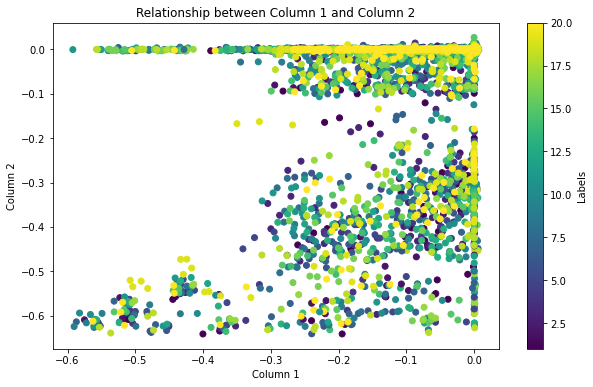

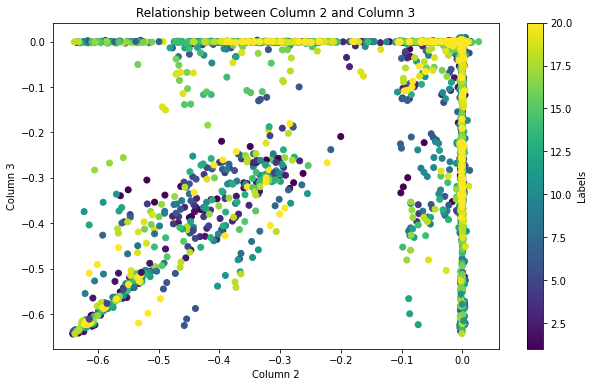

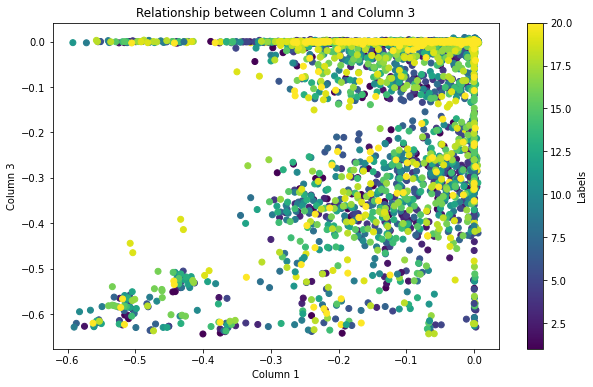

In [16]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# Load the data from the mat file
data = scipy.io.loadmat('concat_with_labels.mat')

# Extract the features and labels
features = data['result'][:, :-2]  # Exclude the last two columns
labels = data['result'][:, -2]  # Second last column

# Get the three columns
column1 = features[:, 0]
column2 = features[:, 1]
column3 = features[:, 2]

# Plot the relationships between the columns
plt.figure(figsize=(10, 6))
plt.scatter(column1, column2, c=labels, cmap='viridis')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Relationship between Column 1 and Column 2')
plt.colorbar(label='Labels')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(column2, column3, c=labels, cmap='viridis')
plt.xlabel('Column 2')
plt.ylabel('Column 3')
plt.title('Relationship between Column 2 and Column 3')
plt.colorbar(label='Labels')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(column1, column3, c=labels, cmap='viridis')
plt.xlabel('Column 1')
plt.ylabel('Column 3')
plt.title('Relationship between Column 1 and Column 3')
plt.colorbar(label='Labels')
plt.show()


In [12]:
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data from the mat file
data = scipy.io.loadmat('concat_with_labels.mat')

# Extract the features and labels
features = data['result'][:, 1:-2]  # Exclude column 1 and the last two columns
labels = data['result'][:, -2]  # Second last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Predict the labels for test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 6.58%


In [13]:
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Load the data from the mat file
data = scipy.io.loadmat('allVids_pca_scores.mat')

# Extract the features and labels
features = data['pcaScores'][:, :-2]  # Exclude column 1 and the last two columns
labels = data['pcaScores'][:, -2]  # Second last column

labels = data_matrix[:, -2]  # Use the 2nd last column as the labels
train_test_indicator = data_matrix[:, -1]  # Use the last column as the train/test indicator

# Split the data into training and testing sets
train_data = data_matrix[train_test_indicator != 4, :-2]  # Exclude the last two columns
train_labels = labels[train_test_indicator != 4]
test_data = data_matrix[train_test_indicator != 4, :-2]  # Exclude the last two columns
test_labels = labels[train_test_indicator != 4]

# Perform data augmentation using SMOTE
smote = SMOTE()
train_data_aug, train_labels_aug = smote.fit_resample(train_data, train_labels)

# Hyperparameter tuning using grid search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
clf = svm.SVC()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(train_data_aug, train_labels_aug)
best_params = grid_search.best_params_

# Initialize and train the SVM classifier with the best parameters
clf = svm.SVC(**best_params)
clf.fit(train_data_aug, train_labels_aug)

# Predict labels for the test data
predictions = clf.predict(test_data)

# Calculate accuracy and print information for each subject
unique_subjects = set(test_labels)
for subject in unique_subjects:
    subject_indices = (test_labels == subject)
    subject_predictions = predictions[subject_indices]
    subject_true_labels = test_labels[subject_indices]
    subject_accuracy = accuracy_score(subject_true_labels, subject_predictions)

    print(f"Subject {subject}:")
    print(f"Accuracy: {subject_accuracy}")
    print(classification_report(subject_true_labels, subject_predictions))
    print("")

    incorrect_predictions = subject_predictions[subject_predictions != subject_true_labels]
    incorrect_subjects = subject_true_labels[subject_predictions != subject_true_labels]
    if len(incorrect_predictions) > 0:
        for i in range(len(incorrect_predictions)):
            print(f"Incorrectly identified as Subject {incorrect_predictions[i]}, True label: {incorrect_subjects[i]}")
        print("")

# Calculate overall accuracy
overall_accuracy = accuracy_score(test_labels, predictions)
print("Overall Accuracy:", overall_accuracy)

Subject 1.0:
Accuracy: 0.09429824561403509
              precision    recall  f1-score   support

         1.0       1.00      0.09      0.17       456
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0
        19.0       0.00      0.00      0.00         0
        20.0       0.00      0.00      0.00         0

    accuracy                           0.09       456
   macro avg       0.07      0.01    

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla


Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrectly identified as Subject 5.0, True label: 3.0
Incorrect

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       1.00      0.08      0.14       456
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0
        19.0       0.00      0.00      0.00         0
        20.0       0.00      0.00      0.00         0

    accuracy                           0.08       456
   macro avg       0.07      0.01      0.01       456
weighted avg       1.00      0.08      0.14       456


Incorrectly identified a

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla

Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectly identified as Subject 5.0, True label: 8.0
Incorrectl

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       1.00      0.01      0.03       456
        11.0       0.00      0.00      0.00         0
        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0
        19.0       0.00      0.00      0.00         0
        20.0       0.00    

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0
        12.0       1.00      0.03      0.06       456
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0
        19.0       0.00      0.00      0.00         0
        20.0       0.00      0.00      0.00         0

    accuracy                           0.03       456
   macro avg       0.07      0.00      0.00       456
weighted avg       1.00   

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0
        14.0       1.00      0.02      0.03       456
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        17.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0
        19.0       0.00      0.00      0.00         0

    accuracy                           0.02       456
   macro avg       0.06   

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla

Incorrectly identified as Subject 14.0, True label: 16.0
Incorrectly identified as Subject 12.0, True label: 16.0
Incorrectly identified as Subject 12.0, True label: 16.0
Incorrectly identified as Subject 12.0, True label: 16.0
Incorrectly identified as Subject 14.0, True label: 16.0
Incorrectly identified as Subject 5.0, True label: 16.0
Incorrectly identified as Subject 2.0, True label: 16.0
Incorrectly identified as Subject 2.0, True label: 16.0
Incorrectly identified as Subject 2.0, True label: 16.0
Incorrectly identified as Subject 5.0, True label: 16.0
Incorrectly identified as Subject 5.0, True label: 16.0
Incorrectly identified as Subject 5.0, True label: 16.0
Incorrectly identified as Subject 5.0, True label: 16.0
Incorrectly identified as Subject 5.0, True label: 16.0
Incorrectly identified as Subject 5.0, True label: 16.0
Incorrectly identified as Subject 5.0, True label: 16.0
Incorrectly identified as Subject 5.0, True label: 16.0
Incorrectly identified as Subject 5.0, True

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        18.0       1.00      0.08      0.15       456
        19.0       0.00      0.00      0.00         0
        20.0       0.00      0.00      0.00         0

    accuracy                           0.08       456
   macro avg       0.07      0.01      0.01       456
weighted avg       1.00      0.08      0.15       456


Incorrectly identified a

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0
        20.0       1.00      0.03      0.05       456

    accuracy                           0.03       456
   macro avg       0.08      0.00      0.00       456
weighted avg       1.00      0.03      0.05       456


Incorrectly identified as Subject 5.0, True label: 20.0
Incorrectly identified

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


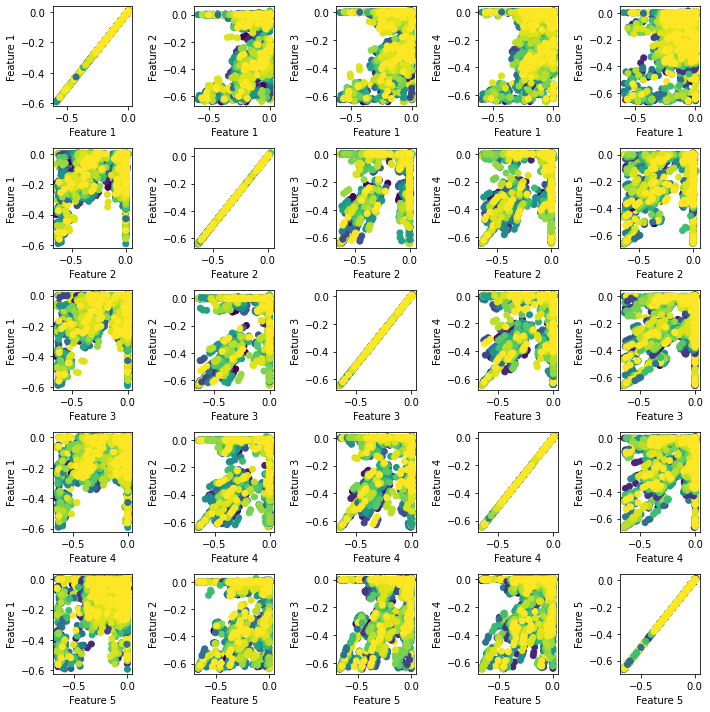

Accuracy: 7.74%


In [14]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data from the mat file
data = scipy.io.loadmat('concat_with_labels.mat')

# Extract the features and labels
features = data['result'][:, :-2]  # Exclude the last two columns
labels = data['result'][:, -2]  # Second last column

# Find rows with any zeros in any column
nonzero_rows = np.all(features != 0, axis=1)

# Filter the features and labels to keep only non-zero rows
filtered_features = features[nonzero_rows]
filtered_labels = labels[nonzero_rows]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_labels, test_size=0.2, random_state=42)

# Plot scatter plots for each pair of features
num_features = filtered_features.shape[1]
fig, axes = plt.subplots(num_features, num_features, figsize=(10, 10))
for i in range(num_features):
    for j in range(num_features):
        axes[i, j].scatter(filtered_features[:, i], filtered_features[:, j], c=filtered_labels, cmap='viridis')
        axes[i, j].set_xlabel(f"Feature {i+1}")
        axes[i, j].set_ylabel(f"Feature {j+1}")
plt.tight_layout()
plt.show()

# Train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Predict the labels for test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


IndexError: index 12143 is out of bounds for axis 0 with size 12143

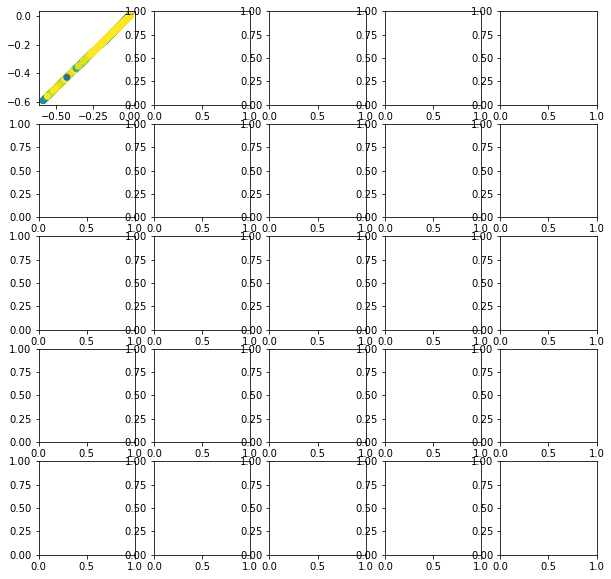

In [15]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data from the mat file
data = scipy.io.loadmat('concat_with_labels.mat')

# Extract the features and labels
features = data['result'][:, :-2]  # Exclude the last two columns
labels = data['result'][:, -2]  # Second last column

# Find rows with any zeros in any column
nonzero_rows = np.all(features != 0, axis=1)

# Filter the features and labels to keep only non-zero rows
filtered_features = features[nonzero_rows]
filtered_labels = labels[nonzero_rows]

# Get the indices of non-zero rows
nonzero_indices = np.where(nonzero_rows)[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_labels, test_size=0.2, random_state=42)

# Plot scatter plots for each pair of features
num_features = filtered_features.shape[1]
fig, axes = plt.subplots(num_features, num_features, figsize=(10, 10))
for i in range(num_features):
    for j in range(num_features):
        axes[i, j].scatter(filtered_features[:, i], filtered_features[:, j], c=filtered_labels, cmap='viridis')
        axes[i, j].scatter(filtered_features[nonzero_indices, i], filtered_features[nonzero_indices, j], facecolors='none', edgecolors='red')
        axes[i, j].set_xlabel(f"Feature {i+1}")
        axes[i, j].set_ylabel(f"Feature {j+1}")
plt.tight_layout()
plt.show()

# Train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Predict the labels for test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Dropped Rows:
[2364 2365 2366 2367 3512 3513 3514 3515 6559 8492 8493 8494 8495 9636
 9637 9638 9639]


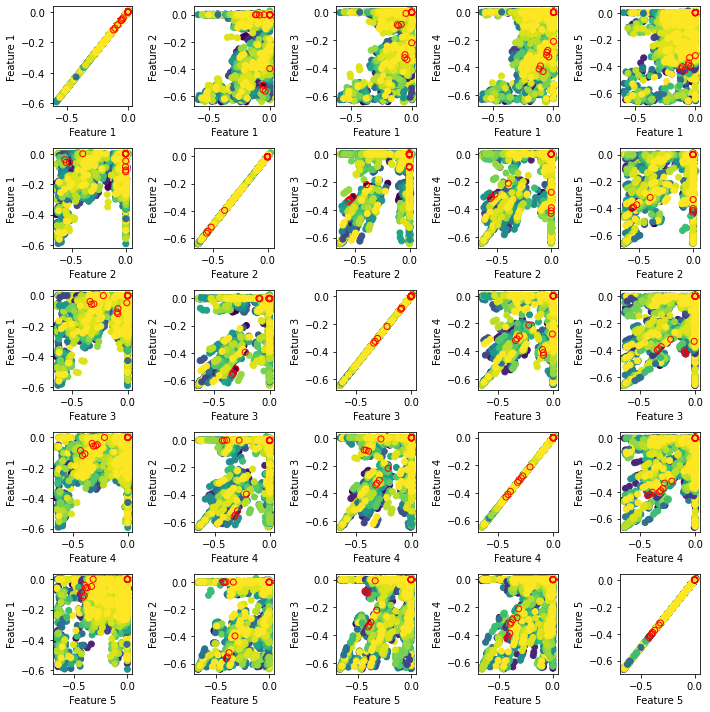

Accuracy: 7.74%


In [17]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data from the mat file
data = scipy.io.loadmat('concat_with_labels.mat')

# Extract the features and labels
features = data['result'][:, :-2]  # Exclude the last two columns
labels = data['result'][:, -2]  # Second last column

# Find rows with any zeros in any column
nonzero_rows = np.all(features != 0, axis=1)

# Get the indices of zero rows
zero_indices = np.where(~nonzero_rows)[0]
print("Dropped Rows:")
print(zero_indices)

# Filter the features and labels to keep only non-zero rows
filtered_features = features[nonzero_rows]
filtered_labels = labels[nonzero_rows]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_labels, test_size=0.2, random_state=42)

# Plot scatter plots for each pair of features
num_features = filtered_features.shape[1]
fig, axes = plt.subplots(num_features, num_features, figsize=(10, 10))
for i in range(num_features):
    for j in range(num_features):
        axes[i, j].scatter(filtered_features[:, i], filtered_features[:, j], c=filtered_labels, cmap='viridis')
        axes[i, j].scatter(filtered_features[zero_indices, i], filtered_features[zero_indices, j], facecolors='none', edgecolors='red')
        axes[i, j].set_xlabel(f"Feature {i+1}")
        axes[i, j].set_ylabel(f"Feature {j+1}")
plt.tight_layout()
plt.show()

# Train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Predict the labels for test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Dropped Rows:
[2364 2365 2366 2367 3512 3513 3514 3515 6559 8492 8493 8494 8495 9636
 9637 9638 9639]


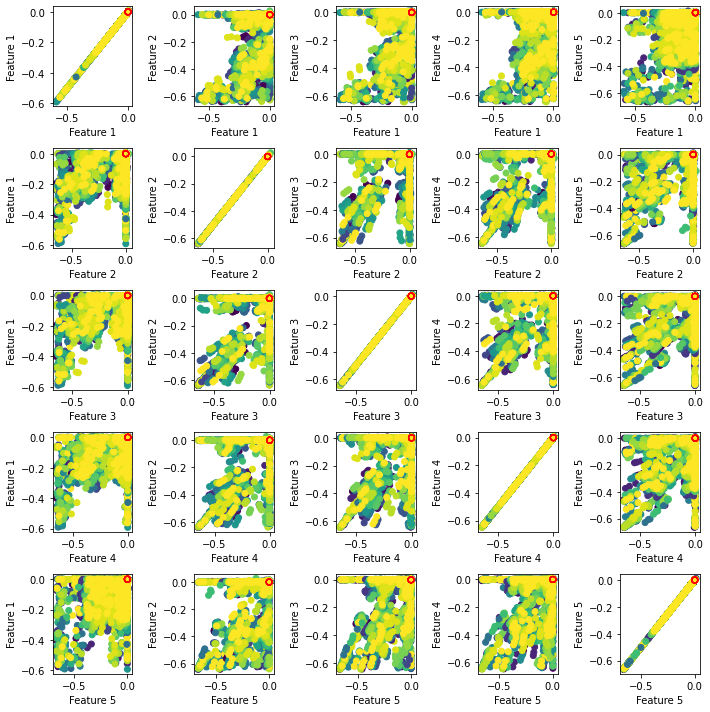

Accuracy: 7.74%


In [18]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data from the mat file
data = scipy.io.loadmat('concat_with_labels.mat')

# Extract the features and labels
features = data['result'][:, :-2]  # Exclude the last two columns
labels = data['result'][:, -2]  # Second last column

# Find rows with any zeros in any column
zero_rows = np.any(features == 0, axis=1)

# Get the indices of zero rows
zero_indices = np.where(zero_rows)[0]
print("Dropped Rows:")
print(zero_indices)

# Filter the features and labels to keep only non-zero rows
filtered_features = features[~zero_rows]
filtered_labels = labels[~zero_rows]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_labels, test_size=0.2, random_state=42)

# Plot scatter plots for each pair of features
num_features = filtered_features.shape[1]
fig, axes = plt.subplots(num_features, num_features, figsize=(10, 10))
for i in range(num_features):
    for j in range(num_features):
        axes[i, j].scatter(filtered_features[:, i], filtered_features[:, j], c=filtered_labels, cmap='viridis')
        axes[i, j].scatter(features[zero_indices, i], features[zero_indices, j], facecolors='none', edgecolors='red')
        axes[i, j].set_xlabel(f"Feature {i+1}")
        axes[i, j].set_ylabel(f"Feature {j+1}")
plt.tight_layout()
plt.show()

# Train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Predict the labels for test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Dropped Rows:
[2364 2365 2366 2367 3512 3513 3514 3515 6559 8492 8493 8494 8495 9636
 9637 9638 9639]


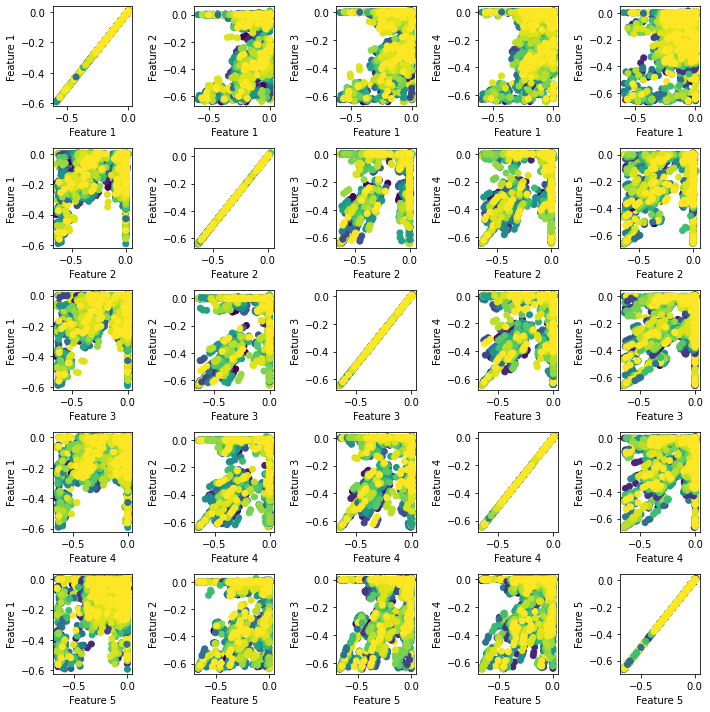

Accuracy: 7.74%


In [19]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data from the mat file
data = scipy.io.loadmat('concat_with_labels.mat')

# Extract the features and labels
features = data['result'][:, :-2]  # Exclude the last two columns
labels = data['result'][:, -2]  # Second last column

# Find rows with any zeros in any column
zero_rows = np.any(features == 0, axis=1)

# Get the indices of zero rows
zero_indices = np.where(zero_rows)[0]
print("Dropped Rows:")
print(zero_indices)

# Filter the features and labels to keep only non-zero rows
filtered_features = features[~zero_rows]
filtered_labels = labels[~zero_rows]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_labels, test_size=0.2, random_state=42)

# Plot scatter plots for each pair of features
num_features = filtered_features.shape[1]
fig, axes = plt.subplots(num_features, num_features, figsize=(10, 10))
for i in range(num_features):
    for j in range(num_features):
        axes[i, j].scatter(filtered_features[:, i], filtered_features[:, j], c=filtered_labels, cmap='viridis')
        axes[i, j].set_xlabel(f"Feature {i+1}")
        axes[i, j].set_ylabel(f"Feature {j+1}")
plt.tight_layout()
plt.show()

# Train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Predict the labels for test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


In [20]:
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Load the data from the mat file
data = scipy.io.loadmat('concat_with_labels.mat')
data_matrix = data['result']

# Extract the features and labels
labels = data_matrix[:, 1:-2]  # Use the 2nd last column as the labels
train_test_indicator = data_matrix[:, -1]  # Use the last column as the train/test indicator

# Split the data into training and testing sets
train_data = data_matrix[train_test_indicator != 4, :-2]  # Exclude the last two columns
train_labels = labels[train_test_indicator != 4]
test_data = data_matrix[train_test_indicator == 4, :-2]  # Exclude the last two columns
test_labels = labels[train_test_indicator == 4]

# Remove rows with any zeros in any column
non_zero_rows = ~np.any(train_data == 0, axis=1)
train_data = train_data[non_zero_rows]
train_labels = train_labels[non_zero_rows]

non_zero_rows = ~np.any(test_data == 0, axis=1)
test_data = test_data[non_zero_rows]
test_labels = test_labels[non_zero_rows]

# Perform data augmentation using SMOTE
smote = SMOTE()
train_data_aug, train_labels_aug = smote.fit_resample(train_data, train_labels)

# Hyperparameter tuning using grid search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
clf = svm.SVC()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(train_data_aug, train_labels_aug)
best_params = grid_search.best_params_

# Initialize and train the SVM classifier with the best parameters
clf = svm.SVC(**best_params)
clf.fit(train_data_aug, train_labels_aug)

# Predict labels for the test data
predictions = clf.predict(test_data)

# Calculate accuracy and print information for each subject
unique_subjects = set(test_labels)
for subject in unique_subjects:
    subject_indices = (test_labels == subject)
    subject_predictions = predictions[subject_indices]
    subject_true_labels = test_labels[subject_indices]
    subject_accuracy = accuracy_score(subject_true_labels, subject_predictions)

    print(f"Subject {subject}:")
    print(f"Accuracy: {subject_accuracy}")
    print(classification_report(subject_true_labels, subject_predictions))
    print("")

    incorrect_predictions = subject_predictions[subject_predictions != subject_true_labels]
    incorrect_subjects = subject_true_labels[subject_predictions != subject_true_labels]
    if len(incorrect_predictions) > 0:
        for i in range(len(incorrect_predictions)):
            print(f"Incorrectly identified as Subject {incorrect_predictions[i]}, True label: {incorrect_subjects[i]}")
        print("")

# Calculate overall accuracy
overall_accuracy = accuracy_score(test_labels, predictions)
print("Overall Accuracy:", overall_accuracy)


ValueError: Unknown label type: 'continuous-multioutput'

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from imblearn.over_sampling import SMOTE
import scipy.io

# Extract the data and labels
features = data_matrix[:, :-2]  # Exclude the last two columns
labels = data_matrix[:, -2]  # Use the 2nd last column as the labels
train_test_indicator = data_matrix[:, -1]  # Use the last column as the train/test indicator

# Filter out rows with zeros in any column
non_zero_rows = ~np.any(features == 0, axis=1)
features = features[non_zero_rows]
labels = labels[non_zero_rows]
train_test_indicator = train_test_indicator[non_zero_rows]

# Split the data into training and testing sets
train_data = features[train_test_indicator != 4]
train_labels = labels[train_test_indicator != 4]
test_data = features[train_test_indicator == 4]
test_labels = labels[train_test_indicator == 4]

# Perform data augmentation using SMOTE
smote = SMOTE()
train_data_aug, train_labels_aug = smote.fit_resample(train_data, train_labels)

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Initialize the SVM classifier
svm_classifier = svm.SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(train_data_aug, train_labels_aug)

# Get the best parameters from grid search
best_params = grid_search.best_params_

# Initialize and train the SVM classifier with the best parameters
clf = svm.SVC(**best_params)
clf.fit(train_data_aug, train_labels_aug)

# Predict labels for the test data
predictions = clf.predict(test_data)

# Calculate accuracy and print information
accuracy = accuracy_score(test_labels, predictions)
classification_report = classification_report(test_labels, predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)


NameError: name 'data_matrix' is not defined

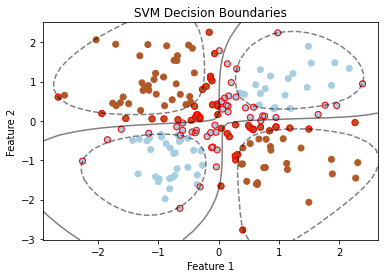

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate some sample data
np.random.seed(0)
X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)  # XOR labels

# Create an SVM classifier
clf = svm.SVC(kernel='rbf')

# Fit the classifier to the data
clf.fit(X, y)

# Get support vectors and their indices
support_vectors = clf.support_vectors_
support_vectors_indices = clf.support_

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', edgecolors='r')

# Plot the decision boundaries
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid of points and evaluate the model at each point
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot the decision boundaries and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundaries')
plt.show()


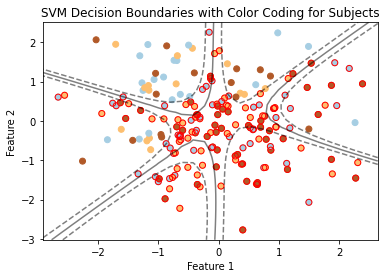

dict_keys(['__header__', '__version__', '__globals__', 'pcaScores'])
Mean values: [ 8.7838421e-09 -8.5485610e-09  9.5656629e-09  1.9214654e-09
  1.0500000e+01  2.5000000e+00]
Standard deviation values: [0.1990271  0.08952903 0.08479565 0.0811081  5.766281   1.118034  ]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import scipy.io

# Generate some sample data
np.random.seed(0)
X = np.random.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)  # XOR labels

# Define the subject labels for each data point
subjects = np.random.randint(1, 4, size=200)  # Assuming there are 3 subjects

# Create an SVM classifier
clf = svm.SVC(kernel='sigmoid')

# Fit the classifier to the data
clf.fit(X, y)

# Get support vectors and their indices
support_vectors = clf.support_vectors_
support_vectors_indices = clf.support_

# Plot the data points with color coding for subjects
plt.scatter(X[:, 0], X[:, 1], c=subjects, cmap=plt.cm.Paired)

# Plot the support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', edgecolors='r')

# Plot the decision boundaries
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid of points and evaluate the model at each point
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot the decision boundaries and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundaries with Color Coding for Subjects')
plt.show()

# Load the MATLAB file
mat_data = scipy.io.loadmat('allVids_pca_scores.mat')

# Check the available keys in the loaded MATLAB file
print(mat_data.keys())

# Replace 'matrix' with the correct key for accessing the data matrix
data_matrix = mat_data['pcaScores']

# Assuming your dataset is stored in a NumPy array called 'data'
mean_values = np.mean(data_matrix, axis=0)
std_values = np.std(data_matrix, axis=0)

print("Mean values:", mean_values)
print("Standard deviation values:", std_values)

# Display SVM

In [12]:
import scipy.io
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm  # Import tqdm for progress bar

# Load the MATLAB file
mat_data = scipy.io.loadmat('concat_with_labels.mat')

# Replace 'pcaScores' with the correct key for accessing the data matrix
data_matrix = mat_data['result']
labels = data_matrix[:, -2]  # Use the 2nd last column as the labels
train_test_indicator = data_matrix[:, -1]  # Use the last column as the train/test indicator

# Split the data into training and testing sets
train_data = data_matrix[train_test_indicator != 4, :-2]  # Exclude the last two columns
train_labels = labels[train_test_indicator != 4]
test_data = data_matrix[train_test_indicator == 4, :-2]  # Exclude the last two columns
test_labels = labels[train_test_indicator == 4]

# Perform data augmentation using SMOTE
smote = SMOTE()
train_data_aug, train_labels_aug = smote.fit_resample(train_data, train_labels)

# Hyperparameter tuning using grid search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
clf = svm.SVC()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(train_data_aug, train_labels_aug)
best_params = grid_search.best_params_

# Initialize and train the SVM classifier with the best parameters
clf = svm.SVC(**best_params)
clf.fit(train_data_aug, train_labels_aug)

# Predict labels for the test data with progress bar
predictions = []
for i in tqdm(range(len(test_data))):
    prediction = clf.predict([test_data[i]])
    predictions.append(prediction[0])

# Calculate accuracy and print information for each subject
unique_subjects = set(test_labels)
for subject in unique_subjects:
    subject_indices = (test_labels == subject)
    subject_predictions = np.array(predictions)[subject_indices]
    subject_true_labels = test_labels[subject_indices]
    subject_accuracy = accuracy_score(subject_true_labels, subject_predictions)

    print(f"Subject {subject}:")
    print(f"Accuracy: {subject_accuracy}")
    print(classification_report(subject_true_labels, subject_predictions))
    print("")

    incorrect_predictions = subject_predictions[subject_predictions != subject_true_labels]
    incorrect_subjects = subject_true_labels[subject_predictions != subject_true_labels]
    if len(incorrect_predictions) > 0:
        for i in range(len(incorrect_predictions)):
            print(f"Incorrectly identified as Subject {incorrect_predictions[i]}, True label: {incorrect_subjects[i]}")
        print("")

# Calculate overall accuracy
overall_accuracy = accuracy_score(test_labels, predictions)
print("Overall Accuracy:", overall_accuracy)


100%|█████████████████████████████████████████████████████████████████████████████| 3040/3040 [00:04<00:00, 661.60it/s]
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  

Subject 1.0:
Accuracy: 0.039473684210526314
              precision    recall  f1-score   support

         1.0       1.00      0.04      0.08       152
         2.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0
        20.0       0.00      0.00      0.00         0

    accuracy                           0.04       152
   macro avg       0.08      0.00      0.01       152
weighted avg       1.00      0.04      0.08       152


Incorrectly identified as Subject 5.0, True label: 1.0
Incorrectly identified as Subject

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\skle

Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectly identified as Subject 5.0, True label: 6.0
Incorrectl

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0
        14.0       1.00      0.02      0.04       152
        15.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0
        19.0       0.00      0.00      0.00         0

    accuracy                           0.02       152
   macro avg       0.08      0.00      0.00       152
weighted avg       1.00      0.02      0.04       152


Incorrectly identified as Subject 5.0, True label: 14.0
Incorrectly identified as Subject 5.0, True label: 14.0
Incorrectly identifi

E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda_Prompt\lib\site-packages\sklearn\metr

In [16]:
string = "19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19;19"


count = string.count("19")
print(count)

1368


In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data from the mat file
data = scipy.io.loadmat('concat_with_labels.mat')

data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Jun 18 16:01:30 2023',
 '__version__': '1.0',
 '__globals__': [],
 'result': array([[ 9.3151095e-05,  1.8832033e-08,  1.0327407e-04, ...,
          5.8849505e-04,  1.0000000e+00,  1.0000000e+00],
        [ 8.9119367e-06,  9.2282324e-09,  7.9959798e-05, ...,
          3.9934836e-04,  1.0000000e+00,  1.0000000e+00],
        [ 3.3016154e-06,  1.4486179e-09,  6.4575484e-05, ...,
          1.9408965e-04,  1.0000000e+00,  1.0000000e+00],
        ...,
        [-2.1382700e-01, -1.7411506e-01, -1.5500189e-01, ...,
         -1.7671622e-01,  4.0000000e+00,  4.0000000e+00],
        [-2.1423972e-01, -1.7637552e-01, -1.5999405e-01, ...,
         -1.8428746e-01,  4.0000000e+00,  4.0000000e+00],
        [-2.1431954e-01, -1.8075845e-01, -1.7400649e-01, ...,
         -1.8646793e-01,  4.0000000e+00,  4.0000000e+00]], dtype=float32)}

In [2]:
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Jun 18 16:01:30 2023', '__version__': '1.0', '__globals__': [], 'result': array([[ 9.3151095e-05,  1.8832033e-08,  1.0327407e-04, ...,
         5.8849505e-04,  1.0000000e+00,  1.0000000e+00],
       [ 8.9119367e-06,  9.2282324e-09,  7.9959798e-05, ...,
         3.9934836e-04,  1.0000000e+00,  1.0000000e+00],
       [ 3.3016154e-06,  1.4486179e-09,  6.4575484e-05, ...,
         1.9408965e-04,  1.0000000e+00,  1.0000000e+00],
       ...,
       [-2.1382700e-01, -1.7411506e-01, -1.5500189e-01, ...,
        -1.7671622e-01,  4.0000000e+00,  4.0000000e+00],
       [-2.1423972e-01, -1.7637552e-01, -1.5999405e-01, ...,
        -1.8428746e-01,  4.0000000e+00,  4.0000000e+00],
       [-2.1431954e-01, -1.8075845e-01, -1.7400649e-01, ...,
        -1.8646793e-01,  4.0000000e+00,  4.0000000e+00]], dtype=float32)}
